# Home assignment 1: Kalman Filter

Imagine a robot. Robot state is described with the following parameters

1. $x$, $y$ - robot coordinates,
2. $V_x$, $V_y$ - velocities.

We can only measure the coordinates of the robot, which should be reflected in the $ H $ matrix.

In this homework assignment:
- Fill in the matrices for the Kalman filter correctly.
- For all three experiments, visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time.
- For all three experiments, visualize the dependence of each component of the gain matrix ($ K $) over time.
     - What does the dynamics of changes in its components say?
- How much does the velocity uncertainty decrease as a result of each experiment?

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
plt.style.use("fivethirtyeight")

In [2]:
def kalman_filter(x, E):
    """Apply Kalman filter to sequence

    Args:
        x: initial state space configuration (location and velocity)
        E: initial covariance matrix
    """
    k_log = []
    states_log = []
    K = None

    for measurement in measurements:
        # prediction
        x = (F @ x) + u
        E = F @ E @ F.T

        # measurement update
        Z = np.array([measurement])
        S = H @ E @ H.T + R
        K = E @ H.T @ np.linalg.inv(S)
        k_log.append(K)
        x = x + (K @ (Z.T - (H @ x)))
        states_log.append(x)
        E = (I - (K @ H)) @ E

#         print(f"x= \n{x}")
        print(f"E= \n{E}")
        

    return k_log, states_log

You could edit `kalman_filter` function if you need more info about the process e.g. `x` values over time and so on

_Hint:_ to define matrices below function [np.diag](https://numpy.org/doc/stable/reference/generated/numpy.diag.html) is very handy

In [3]:
dt = 0.1

# initial covariance matrix: 0. for positions x and y, 1000 for the two velocities
E = np.diag([0., 0., 1000., 1000.])

# next state function: 4D
F = np.array([
    [1., 0., dt, 0.],
    [0., 1., 0., dt],
    [0., 0., 1., 0.],
    [0., 0., 0., 1.],
])

# measurement function: reflect the fact that we observe x and y but not the two velocities
H = np.array([
    [1., 0., 0., 0.],
    [0., 1., 0., 0.],
])

# measurement uncertainty: use 2x2 matrix with 0.1 as main diagonal
R = np.diag([0.1, 0.1])

# 4D identity matrix
I = np.eye(4)

## First experiment

In [4]:
measurements = [[5.0, 10.0], [6.0, 8.0], [7.0, 6.0], [8.0, 4.0], [9.0, 2.0], [10.0, 0.0]]
initial_xy = [4.0, 12.0]


# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

In [5]:
k_log_exp_1, states_log_exp_1 = kalman_filter(x, E)

E= 
[[0.0990099  0.         0.99009901 0.        ]
 [0.         0.0990099  0.         0.99009901]
 [0.99009901 0.         9.9009901  0.        ]
 [0.         0.99009901 0.         9.9009901 ]]
E= 
[[0.07984032 0.         0.3992016  0.        ]
 [0.         0.07984032 0.         0.3992016 ]
 [0.3992016  0.         1.99600798 0.        ]
 [0.         0.3992016  0.         1.99600798]]
E= 
[[0.06423983 0.         0.21413276 0.        ]
 [0.         0.06423983 0.         0.21413276]
 [0.21413276 0.         0.71377587 0.        ]
 [0.         0.21413276 0.         0.71377587]]
E= 
[[0.05331556 0.         0.1332889  0.        ]
 [0.         0.05331556 0.         0.1332889 ]
 [0.1332889  0.         0.33322226 0.        ]
 [0.         0.1332889  0.         0.33322226]]
E= 
[[0.04544628 0.         0.09089256 0.        ]
 [0.         0.04544628 0.         0.09089256]
 [0.09089256 0.         0.18178513 0.        ]
 [0.         0.09089256 0.         0.18178513]]
E= 
[[0.03955609 0.         0.06592

Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

_(It's a good idea to write a function for this, so you could reuse it in the next experiment)_

In [6]:
states_log_exp_1.insert(0, x)

In [7]:
def plot_dependence(states_log: list, dt: float):
    """Plot dependence of `x`, `y`, `V_x`, `V_y` over time
    
    Args:
        state_log: List with matrices of states
        dt: timedelta
    """
    fig, ax = plt.subplots(2, 2, figsize=(16, 16))
    time = [dt * i for i in range(1, len(states_log) + 1)]
    x, y, V_x, V_y = [], [], [], []
    for frame in states_log:
        x.append(frame[0][0])
        y.append(frame[1][0])
        V_x.append(frame[2][0])
        V_y.append(frame[3][0])
    
    ax[0][0].plot(time, x, label="$x$")
    ax[0][0].set_xlabel("Time")
    ax[0][0].legend()
    
    ax[0][1].plot(time, y, label="$y$")
    ax[0][1].set_xlabel("Time")
    ax[0][1].legend()
    
    ax[1][0].plot(time, V_x, label="$V_x$")
    ax[1][0].set_xlabel("Time")
    ax[1][0].legend()
    
    ax[1][1].plot(time, V_y, label="$V_y$")
    ax[1][1].set_xlabel("Time")
    ax[1][1].legend()
    
    plt.show()

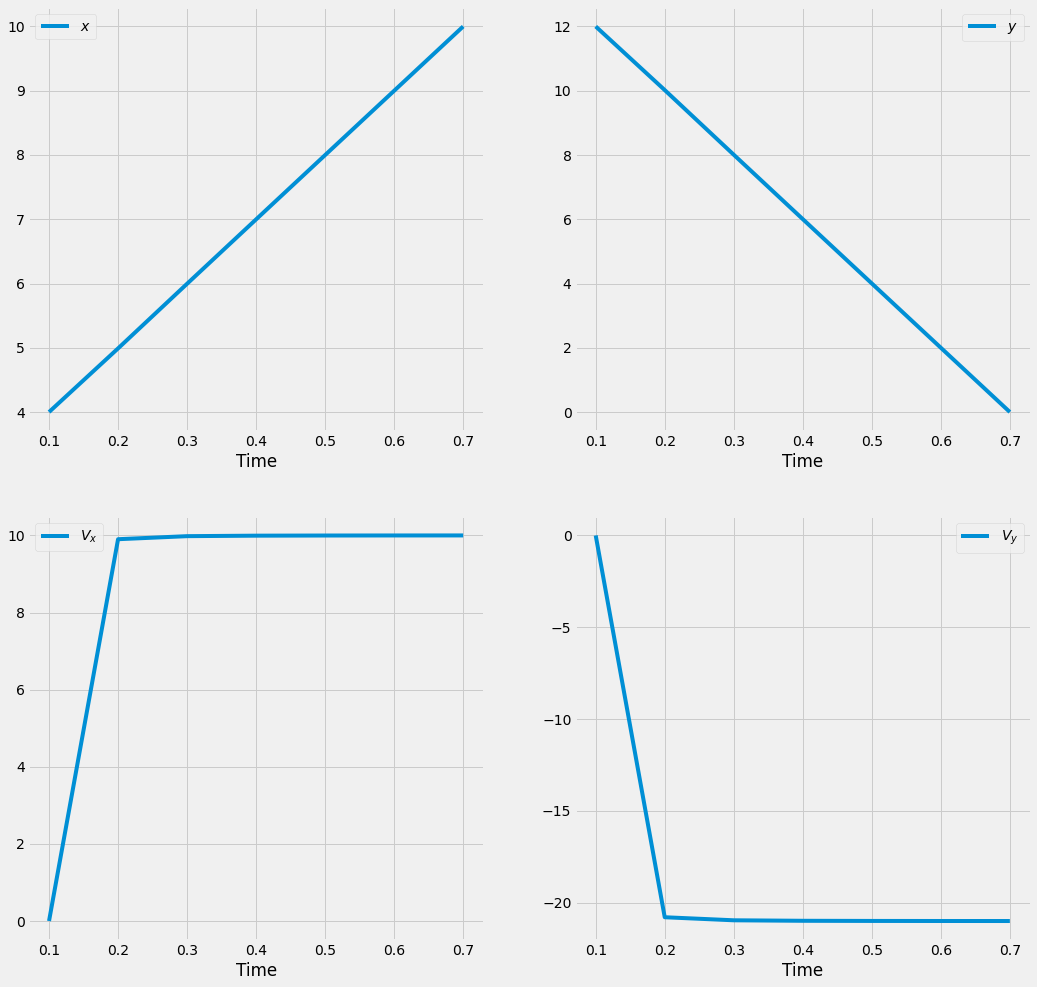

In [8]:
plot_dependence(states_log_exp_1, dt)

Visualize the components of the $ K $ matrix below

In [9]:
def plot_k_matrix_over_time(k_log: list):
    """Plot `K` matrix over time
    """
    x_labels = ["$x$", "$y$"]
    y_labels = ["$x$", "$y$", "$V_x$", "$V_y$"]
    for frame in k_log:
        fig, ax = plt.subplots(1, 1, figsize=(8, 8))
        cax = ax.matshow(frame)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + x_labels)
        ax.set_yticklabels([''] + y_labels)
        plt.show()

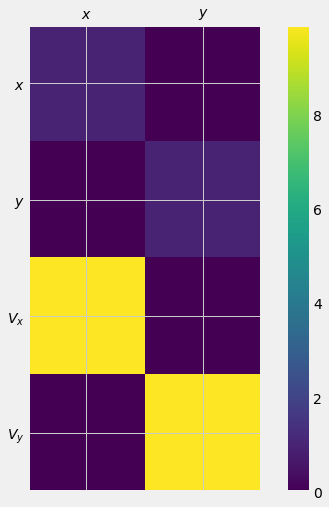

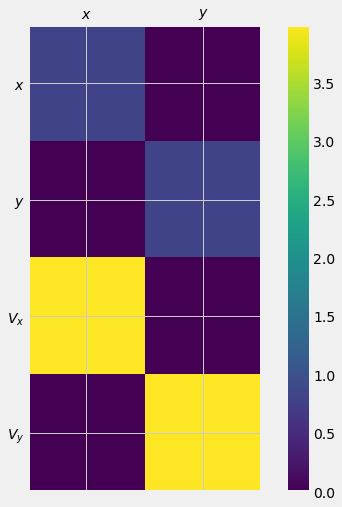

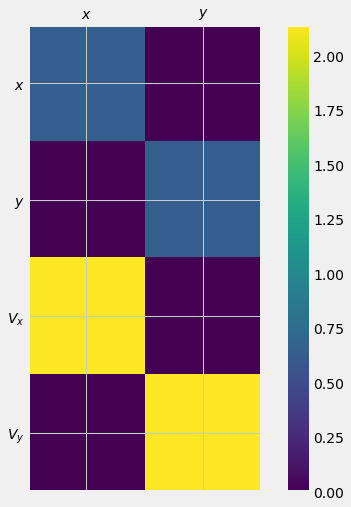

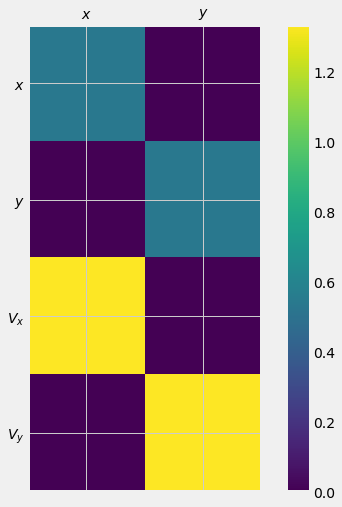

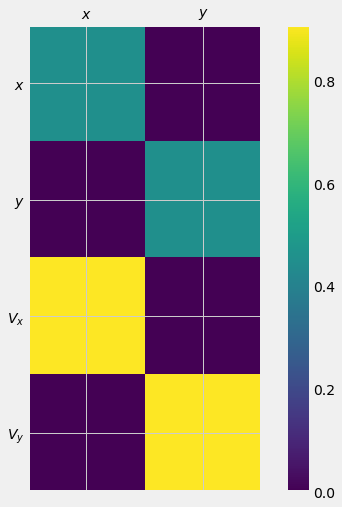

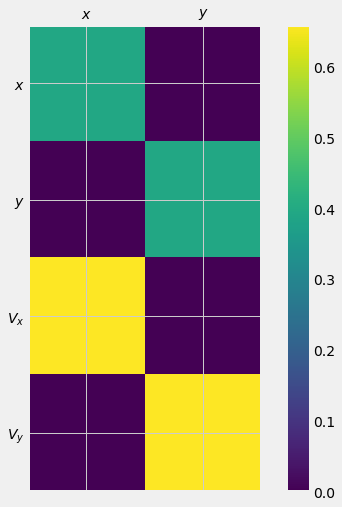

In [10]:
plot_k_matrix_over_time(k_log_exp_1)

## Second experiment

In [11]:
measurements = [[1.0, 4.0], [6.0, 0.0], [11.0, -4.0], [16.0, -8.0]]
initial_xy = [-4.0, 8.0]

dt = 0.1

# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

In [12]:
k_log_exp_2, states_log_exp_2 = kalman_filter(x, E)

E= 
[[0.0990099  0.         0.99009901 0.        ]
 [0.         0.0990099  0.         0.99009901]
 [0.99009901 0.         9.9009901  0.        ]
 [0.         0.99009901 0.         9.9009901 ]]
E= 
[[0.07984032 0.         0.3992016  0.        ]
 [0.         0.07984032 0.         0.3992016 ]
 [0.3992016  0.         1.99600798 0.        ]
 [0.         0.3992016  0.         1.99600798]]
E= 
[[0.06423983 0.         0.21413276 0.        ]
 [0.         0.06423983 0.         0.21413276]
 [0.21413276 0.         0.71377587 0.        ]
 [0.         0.21413276 0.         0.71377587]]
E= 
[[0.05331556 0.         0.1332889  0.        ]
 [0.         0.05331556 0.         0.1332889 ]
 [0.1332889  0.         0.33322226 0.        ]
 [0.         0.1332889  0.         0.33322226]]


Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

In [13]:
states_log_exp_2.insert(0, x)

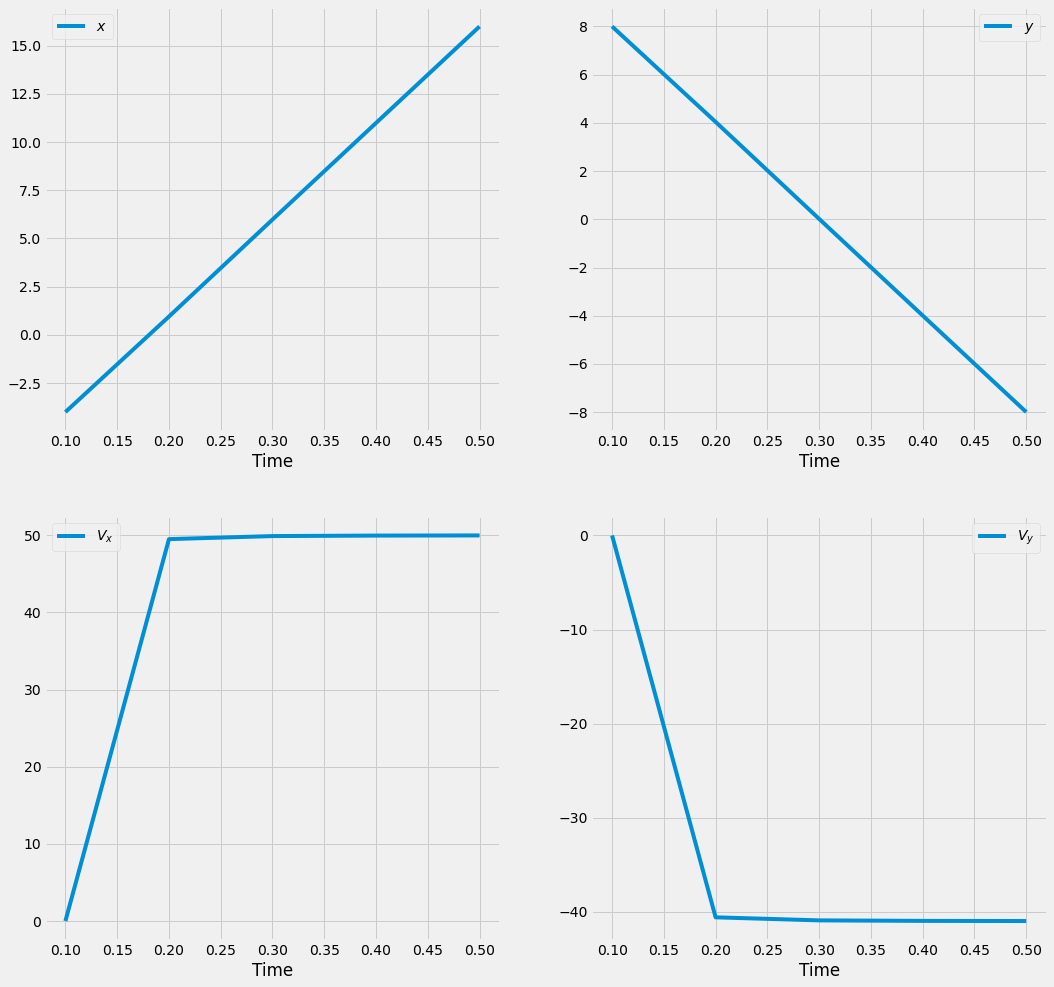

In [14]:
plot_dependence(states_log_exp_2, dt)

Visualize the components of the $ K $ matrix below

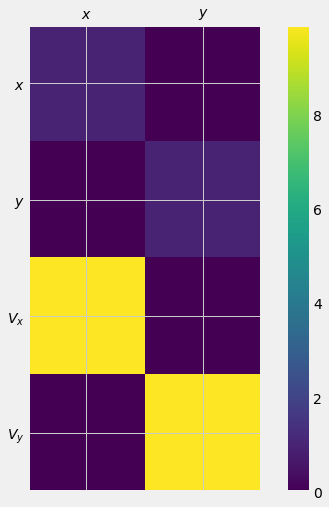

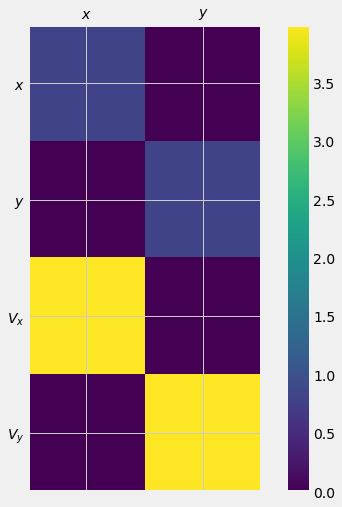

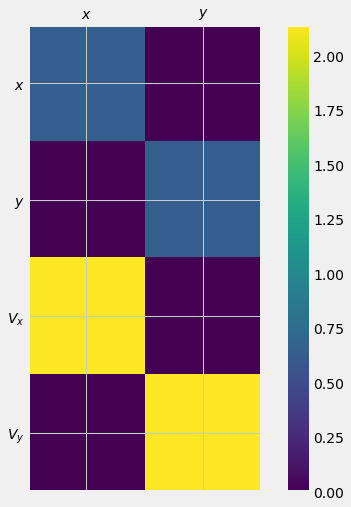

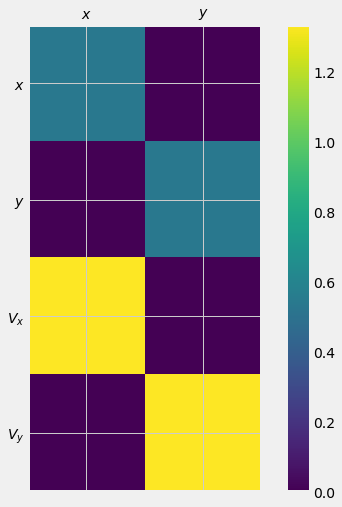

In [15]:
plot_k_matrix_over_time(k_log_exp_2)

## Third Experiment

In [16]:
measurements = [[1.0, 17.0], [1.0, 15.0], [1.0, 13.0], [1.0, 11.0]]
initial_xy = [1.0, 19.0]

dt = 0.1

# initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.0], [0.0]])
# external motion applied to the robot
u = np.array([[0.0], [0.1], [0.0], [0.0]])

In [17]:
k_log_exp_3, states_log_exp_3 = kalman_filter(x, E)

E= 
[[0.0990099  0.         0.99009901 0.        ]
 [0.         0.0990099  0.         0.99009901]
 [0.99009901 0.         9.9009901  0.        ]
 [0.         0.99009901 0.         9.9009901 ]]
E= 
[[0.07984032 0.         0.3992016  0.        ]
 [0.         0.07984032 0.         0.3992016 ]
 [0.3992016  0.         1.99600798 0.        ]
 [0.         0.3992016  0.         1.99600798]]
E= 
[[0.06423983 0.         0.21413276 0.        ]
 [0.         0.06423983 0.         0.21413276]
 [0.21413276 0.         0.71377587 0.        ]
 [0.         0.21413276 0.         0.71377587]]
E= 
[[0.05331556 0.         0.1332889  0.        ]
 [0.         0.05331556 0.         0.1332889 ]
 [0.1332889  0.         0.33322226 0.        ]
 [0.         0.1332889  0.         0.33322226]]


Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

In [18]:
states_log_exp_3.insert(0, x)

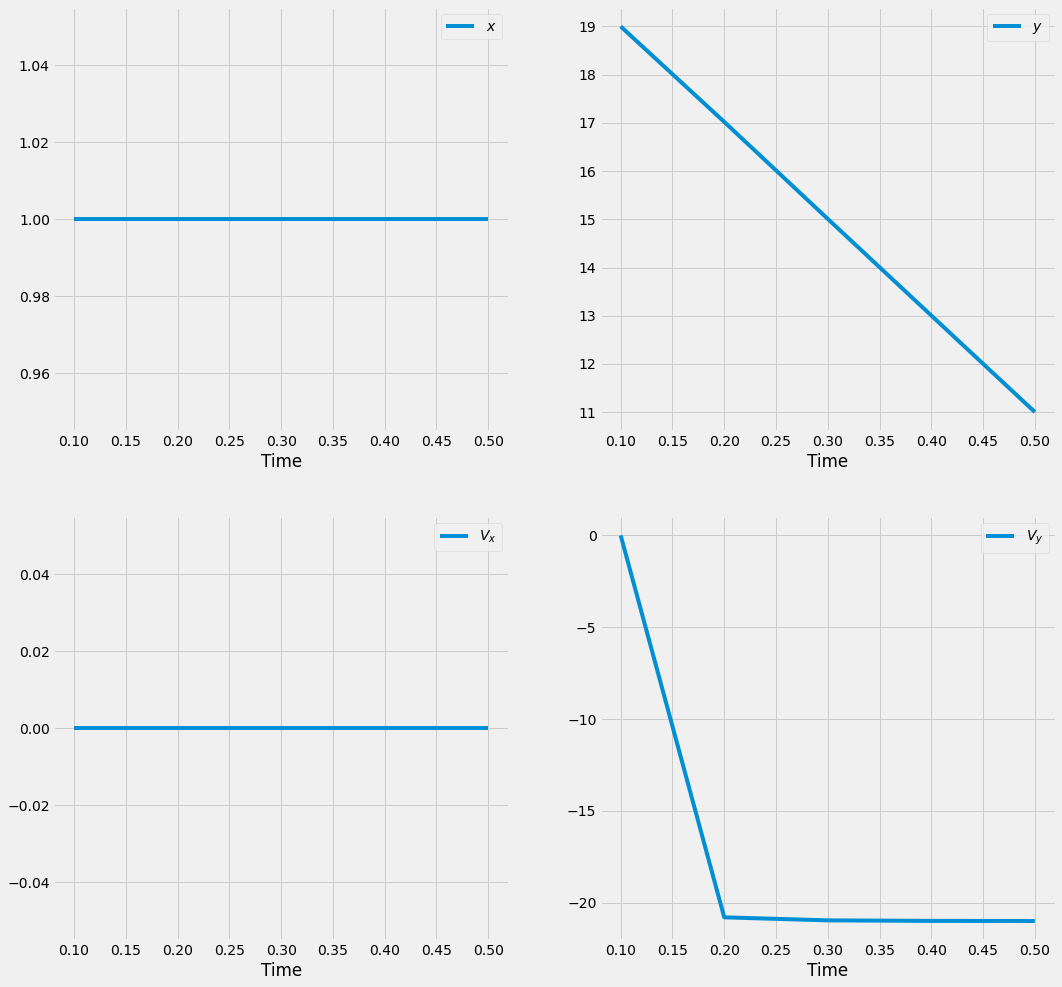

In [19]:
plot_dependence(states_log_exp_3, dt)

Visualize the components of the $ K $ matrix below

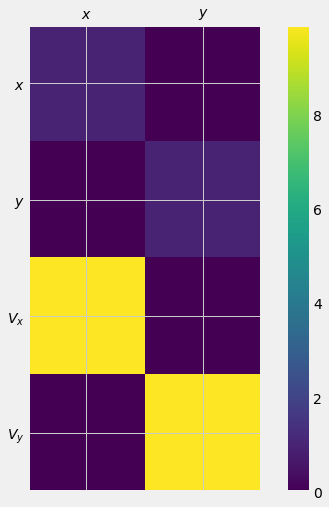

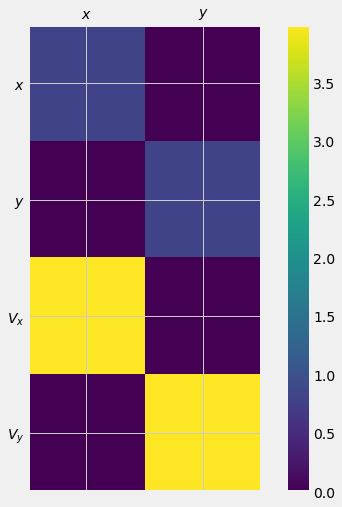

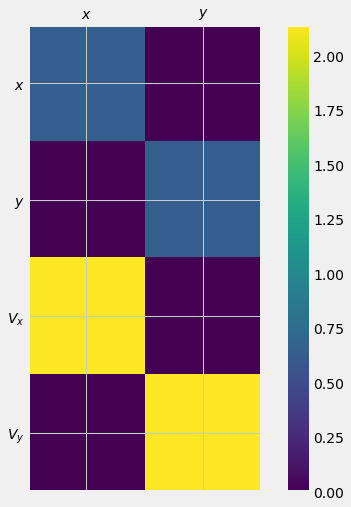

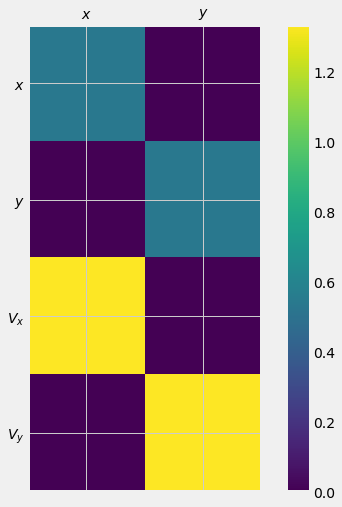

In [20]:
plot_k_matrix_over_time(k_log_exp_3)

## Conclusions

Don't forget to put your thoughts on the experiments above.

Questions to stimulate thoughts could be found in the beginning of the notebook =)

### One can consider Kalman gain matrix $K$ as weighted matrix: the greater the $K$, the greater the contribution of the previous measurements to the estimation of the next $x_t$, and the smaller the $K$, the greater the contribution of the forecasts of $\hat{x}_t$.

### In the first experiment, Kalman gain decreases in both components over time. Thus, with each iteration, the filter "relies" more strongly on its forecast estimate and weakly evaluates the contribution of measurements. This can be explained by the fact that at the initial moment of time the filter parameters are not optimal, so the filter gives more preference to measurements.

### As one can see, $\sigma^2_{V_x}$ and $\sigma^2_{V_y}$ decreased over time drastically from $1000$ to $0.33$ or lower, so our confidence in velocity estimation increased as much as it can in model's assumptions, but at the same time one can notice slightly increase in covariance between $x$ and $V_x$ and $y$ and $V_y$ respectively.